In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer
from keras.regularizers import L1L2, l2, l1
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from custom_pooling import RMSPooling2D
from keras.optimizers import SGD, Adam
from keras.layers import LeakyReLU
#from data import BALANCE_WEIGHTS
from keras.preprocessing.image import ImageDataGenerator
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#import os
from datetime import datetime as dt
from custom_loss import WeightedCategoricalCrossEntropy
from VCM import VCM
from QWK import QWK
import keras.backend as K
from Fractional_MAXPOOL import FractionalPooling2D

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or 

In [2]:
def get_experiment_id():
    time_str = dt.now().strftime('%Y-%m-%d-%H-%M-%S')
    experiment_id = 'base_{}'.format(time_str)
    return experiment_id
p_ratio=[1.0, 1.44, 1.73, 1.0]

model = Sequential()


model.add(Conv2D(16, (5, 5), activation='tanh', input_shape=(300, 300, 3)))
model.add(Conv2D(16, (5, 5), activation='tanh'))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(LeakyReLU(alpha=0.01))
model.add(FractionalPooling2D(pool_ratio=(1, 1.6, 1.6, 1),pseudo_random = True,overlap=True))

model.add(Conv2D(16, (3, 3), activation='tanh'))
model.add(Conv2D(16, (3, 3), activation='tanh'))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(FractionalPooling2D(pool_ratio=(1, 1.8, 1.8, 1),pseudo_random = True,overlap=True))

#model.add(LeakyReLU(alpha=0.01))


model.add(Conv2D(16, (5, 5), activation='tanh'))
model.add(Conv2D(16, (5, 5), activation='tanh'))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(LeakyReLU(alpha=0.01))


model.add(FractionalPooling2D(pool_ratio=(1, 1.6, 1.6, 1),pseudo_random = True,overlap=True))

model.add(Conv2D(16, (5, 5), activation='tanh'))
model.add(Conv2D(16, (5, 5), activation='tanh'))
#model.add(InputLayer(input_tensor=tf.nn.fractional_max_pool(model.layers[1].output, p_ratio)[0]))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(LeakyReLU(alpha=0.01))

model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(Conv2D(32, (3, 3), activation='tanh'))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(LeakyReLU(alpha=0.01))          
model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(Conv2D(32, (3, 3), activation='tanh'))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
#model.add(LeakyReLU(alpha=0.01))
#model.add(FractionalPooling2D(pool_ratio=(1, 1.8, 1.8, 1),pseudo_random = True,overlap=True))

model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(Conv2D(32, (3, 3), activation='tanh'))
#model.add(Dense(8,activation='tanh', kernel_regularizer=regularizers.l2(0.0001)))
model.add(FractionalPooling2D(pool_ratio=(1, 1.6, 1.6, 1),pseudo_random = True,overlap=True))

model.add(Conv2D(32, (3, 3), activation='tanh'))
model.add(Conv2D(32, (3, 3), activation='tanh'))
#model.add(InputLayer(input_tensor=tf.nn.fractional_max_pool(model.layers[1].output, p_ratio)[0]))
#model.add(FractionalPooling2D(pool_ratio=(1, 1.8, 1.8, 1),pseudo_random = True,overlap=True))

model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(FractionalPooling2D(pool_ratio=(1, 1.6, 1.6, 1),pseudo_random = True,overlap=True))
model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(Conv2D(64, (3, 3), activation='tanh'))


model.add(Conv2D(64, (3, 3), activation='tanh'))
model.add(Conv2D(64, (3, 3), activation='tanh'))
#model.add(InputLayer(input_tensor=tf.nn.fractional_max_pool(model.layers[1].output, p_ratio)[0]))

#model.add(MaxPooling2D(pool_size=1))




model.add(FractionalPooling2D(pool_ratio=(1, 1.7, 1.7, 1),pseudo_random = True,overlap=True))

model.add(Flatten())


#chnaged from 10 to 5 because an error 
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.count_params()
#adam = Adam(lr=0.0005, decay=1e-6)
#rmsprop
#Mloss = WeightedCategoricalCrossEntropy({0: 0.4125861396437394, 1: 1.4918664786083686, 2: 0.690426457789382, 3: 3.9541433021806855, 4: 4.885604311008468})
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acc','binary_accuracy','mae'])
model.summary()
loss_no_weight_decay = model.total_loss - sum(model.losses)
model.metrics_tensors.append(loss_no_weight_decay)
model.metrics_names.append('loss_no_weight_decay')
#############################################################################################
#############################################################################################
#############################################################################################
#############################################################################################
#Preparing Data Augmentation Configuration 
train_datagen = ImageDataGenerator(
        rescale=1./255,
#        featurewise_center=True,
 #       samplewise_center=True,
        shear_range=0,
        zoom_range=0.0,#[1 / 1.15, 1.15],
        horizontal_flip=False,#True,
        rotation_range=0)#90,
#        validation_split=0.2)
"""
For the test set only rescale should be made 
"""
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    directory=r"/media/husam/Data/ROP_EXp/three_class_grah/train",
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    shuffle=True,
    seed=42)
#    subset="training")
#    save_to_dir="D:/Separating Images into subfolders/train_augmented")


#print(train_generator.class_indices)

valid_generator = valid_datagen.flow_from_directory(
    directory=r"/media/husam/Data/ROP_EXp/three_class_grah/vald",
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=64,
    class_mode="categorical",
    shuffle=True,
    seed=42)
#    subset="validation")
#    save_to_dir="D:/Separating Images into subfolders/val_augmented"


test_generator = test_datagen.flow_from_directory(
    directory=r"/media/husam/Data/ROP_EXp/three_class_grah/test",
    target_size=(300, 300),
    color_mode="rgb",
    batch_size=1,
    class_mode="categorical",
    shuffle=False,
    seed=42)
#    save_to_dir="D:/Separating Images into subfolders/test_augmented")


# Fitting/Training the model
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
experiment_id = get_experiment_id()
callbacks = [
    QWK(valid_generator, STEP_SIZE_VALID),
    EarlyStopping(monitor='val_acc', patience=50, min_delta=0.001, verbose=1),
    ModelCheckpoint(experiment_id + "-val_kapa_checkpoint.hdf5", monitor='val_kappa', verbose=1, save_best_only=True, mode='max'),
    ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=7, verbose=1, mode='auto', min_delta=0.001, cooldown=0, min_lr=1e-7),
    VCM(valid_generator,STEP_SIZE_VALID)
    
]

class_weight_list = class_weight.compute_class_weight('balanced', np.unique(train_generator.classes), train_generator.classes)
class_weights = dict(zip(np.unique(train_generator.classes), class_weight_list))

history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    class_weight=class_weights,
                    callbacks=callbacks,
                    epochs=50  
)


# Evaluating the model 
#predicting output
#reseting the test generator before calling predict_generator, in order not to get weird output
test_generator.reset()
#test_imgs, test_labels = next(test_generator)

y_pred = model.predict_generator(test_generator, verbose=1,steps=len(test_generator))

score = model.evaluate_generator(generator=test_generator, verbose=1,steps=len(test_generator))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#y_pred =


y_pred = np.argmax(y_pred, axis=1) #multiple categories
# mapping the labels to its classes 
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in y_pred]

y_true = (test_generator.classes)
#confusion Matrix and Classification Report
# generator.classes gives you the truth label y_true
print('Confusion Matrix')
cm = confusion_matrix(y_true, y_pred)

print(cm)

print('Classification Report')
target_names = ['0', '1', '2']
print(classification_report(y_true, y_pred, target_names=target_names))



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 296, 296, 16)      1216      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 292, 292, 16)      6416      
_________________________________________________________________
fractional_pooling2d_1 (Frac (None, 182, 182, 16)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      2320      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 178, 178, 16)      2320      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 174, 174, 16)      6416      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 170, 170, 16)     

— val_kappa: 0.0 

Epoch 00009: val_kappa did not improve from 0.00000
Confusion matrix: 
 [[26  0  0]
 [ 8  0  0]
 [18  0  0]]
Epoch 10/50
9/9 [==============================] - 21s 2s/step - loss: 1.1080 - acc: 0.4033 - binary_accuracy: 0.6690 - mean_absolute_error: 0.4387 - loss_no_weight_decay: 1.1080 - val_loss: 0.9852 - val_acc: 0.6346 - val_binary_accuracy: 0.6667 - val_mean_absolute_error: 0.4152 - val_loss_no_weight_decay: 0.9852
— val_kappa: 0.0 

Epoch 00010: val_kappa did not improve from 0.00000
Confusion matrix: 
 [[31  0  0]
 [ 9  0  0]
 [12  0  0]]
Epoch 11/50
9/9 [==============================] - 22s 2s/step - loss: 1.0107 - acc: 0.4892 - binary_accuracy: 0.6719 - mean_absolute_error: 0.4250 - loss_no_weight_decay: 1.0107 - val_loss: 0.9706 - val_acc: 0.6406 - val_binary_accuracy: 0.6719 - val_mean_absolute_error: 0.4116 - val_loss_no_weight_decay: 0.9706
— val_kappa: 0.04123711340206171 

Epoch 00011: val_kappa improved from 0.00000 to 0.04124, saving model to base_2

9/9 [==============================] - 23s 3s/step - loss: 0.8368 - acc: 0.6424 - binary_accuracy: 0.7662 - mean_absolute_error: 0.3142 - loss_no_weight_decay: 0.8368 - val_loss: 0.8863 - val_acc: 0.5769 - val_binary_accuracy: 0.7308 - val_mean_absolute_error: 0.3509 - val_loss_no_weight_decay: 0.8863
— val_kappa: 0.34024896265560156 

Epoch 00026: val_kappa did not improve from 0.56790
Confusion matrix: 
 [[23  2  5]
 [ 1  2  0]
 [ 5  9  5]]
Epoch 27/50
9/9 [==============================] - 21s 2s/step - loss: 0.7765 - acc: 0.6115 - binary_accuracy: 0.7626 - mean_absolute_error: 0.3070 - loss_no_weight_decay: 0.7765 - val_loss: 0.6488 - val_acc: 0.7031 - val_binary_accuracy: 0.7969 - val_mean_absolute_error: 0.2881 - val_loss_no_weight_decay: 0.6488
— val_kappa: 0.4545454545454546 

Epoch 00027: val_kappa did not improve from 0.56790
Confusion matrix: 
 [[26  0  1]
 [ 2  5  0]
 [ 8  6  4]]
Epoch 28/50
9/9 [==============================] - 21s 2s/step - loss: 0.7591 - acc: 0.6525 - b

9/9 [==============================] - 21s 2s/step - loss: 0.6831 - acc: 0.7217 - binary_accuracy: 0.8164 - mean_absolute_error: 0.2624 - loss_no_weight_decay: 0.6831 - val_loss: 0.6027 - val_acc: 0.7344 - val_binary_accuracy: 0.8438 - val_mean_absolute_error: 0.2373 - val_loss_no_weight_decay: 0.6027
— val_kappa: 0.6370967741935485 

Epoch 00043: val_kappa did not improve from 0.70968

Epoch 00043: ReduceLROnPlateau reducing learning rate to 6.25000029685907e-05.
Confusion matrix: 
 [[27  1  1]
 [ 0  2  2]
 [ 5  3 11]]
Epoch 44/50
9/9 [==============================] - 21s 2s/step - loss: 0.6245 - acc: 0.7658 - binary_accuracy: 0.8357 - mean_absolute_error: 0.2470 - loss_no_weight_decay: 0.6245 - val_loss: 0.5367 - val_acc: 0.7308 - val_binary_accuracy: 0.8333 - val_mean_absolute_error: 0.2405 - val_loss_no_weight_decay: 0.5367
— val_kappa: 0.5577689243027889 

Epoch 00044: val_kappa did not improve from 0.70968
Confusion matrix: 
 [[20  0  3]
 [ 3  5  1]
 [ 2  5 13]]
Epoch 45/50
9/9 

In [3]:
from Kappa_Skl import kappa
def kappa2(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true = y_true.dot(range(y_true.shape[1]))
    if len(y_pred.shape) > 1 and y_pred.shape[1] > 1:
        y_pred = y_pred.dot(range(y_pred.shape[1]))
    try:
        return kappa(y_true, y_pred, weights='quadratic')
    except IndexError:
        return np.nan
    
print('Quadratic_wieghted_kappa')
print(kappa2(y_true, y_pred))

Quadratic_wieghted_kappa
0.5697478991596638


dict_keys(['val_loss', 'val_acc', 'val_binary_accuracy', 'val_mean_absolute_error', 'val_loss_no_weight_decay', 'loss', 'acc', 'binary_accuracy', 'mean_absolute_error', 'loss_no_weight_decay', 'val_kappa', 'lr'])


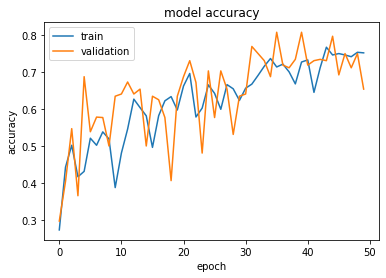

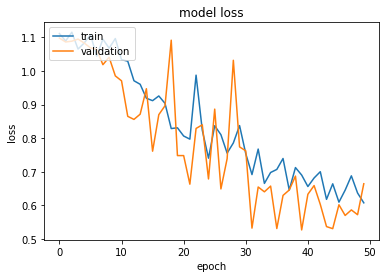

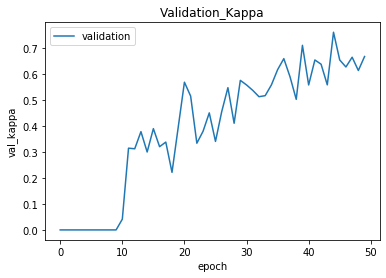

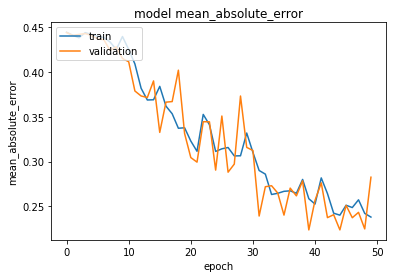

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import os
import wandb
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#plt.savefig('model accuracy.png')
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#plt.savefig('model loss.png')

# summarize history for val_kappa
plt.plot(history.history['val_kappa'])
plt.title('Validation_Kappa')
plt.ylabel('val_kappa')
plt.xlabel('epoch')
plt.legend([ 'validation'], loc='upper left')
plt.show()
#plt.savefig('model validation_kappa.png')

# summarize history for mean_absolute _error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
#plt.savefig('model maey.png'